In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
import numpy as np
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import time
from tqdm import tqdm


In [2]:
adata = sc.read('insert data for Lee et Al Covid and HC here')

In [3]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e6)

sc.pp.log1p(adata)

In [4]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes = 2000)
sc.pp.scale(adata)

In [5]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs=15)
sc.tl.umap(adata,min_dist = 0.5)
sc.tl.leiden(adata, key_added = "leiden", neighbors_key = 'neighbors', resolution = 1)

In [6]:
data_sctype =  '../../classifiers_results/test_data/scType_LeeCovHCRESULTS.csv'
res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()

ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])
res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)
inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

resb = res.copy(deep = True)
resb = resb.set_index(['Unnamed: 0'])

data_sctype =  '../../classifiers_results/test_data/scType_LeeHCRESULTS.csv'
res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()

ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])
res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)
inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

resh = res.copy(deep = True)
resh = resh.set_index(['Unnamed: 0'])

data_sctype =  '../../classifiers_results/test_data/scType_LeeCovRESULTS.csv'
res = pd.read_csv(data_sctype, sep = ';')

res['ct_pred'] = res['customclassif'].copy()

ct_dic = {'Naive B cells':'B', 'Pre-B cells':'B',  'Plasmacytoid Dendritic cells': 'pDC', 'Non-classical monocytes':'Non-classical Monocyte', 'Natural killer  cells':'NK', 'Naive CD4+ T cells': 'CD4T', 'CD8+ NKT-like cells':'CD8T', 'Classical Monocytes':'Classical Monocyte', 'Platelets':'Platelet', 'Myeloid Dendritic cells': 'DC', 'γδ-T cells':'γδ-T cells', 
          'Effector CD8+ T cells':'CD8T', 'Memory CD4+ T cells': 'CD4T', 'Naive CD8+ T cells': 'CD8T', 'Effector CD4+ T cells':'CD4T', 'Memory CD8+ T cells':'CD8T', 
         'ISG expressing immune cells':'ISGs', 'Memory B cells':'B', 'Macrophages':'Macrophages', 'Megakaryocyte':'Megakaryocyte', 'Plasma B cells':'Plasma B', 'Progenitor cells': 'Progenitor cells', 'Erythroid-like and erythroid precursor cells': 'Erythroid-like and erythroid precursor cells',
         'Basophils':'Basophils', 'Neutrophils':'Neutrophil', 'Granulocytes':'Granulocytes', 'HSC/MPP cells':'HSC/MPP cells', 'Unknown':'Unknown', 'Erythroid-like and erythroid precursor cells':'Erythrocyte'}

res['ct_pred'] = res['ct_pred'].apply(lambda x: ct_dic[x])
res.ct_pred = res.ct_pred.astype(str)
res.CellType = res.CellType.astype(str)

inds = res[res.ct_pred == 'Macrophages'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']
inds = res[res.ct_pred == 'ISGs'].index
res.loc[inds, 'ct_pred'] = res.loc[inds, 'CellType']

resc = res.copy(deep = True)
resc = resc.set_index(['Unnamed: 0'])

In [7]:
adata.obs['scType Together'] = resb['ct_pred'].values

ress = pd.concat([resh, resc])
adata.obs['scType Separate'] = 'X'
adata.obs.loc[ress.index, 'scType Separate'] = ress['ct_pred'].values

In [8]:
#Lee HC and Covid
predsb = pd.read_csv('../../classifiers_results/test_data/BLC_LeeCovHCRESULTS.csv')

#Lee HC
predsh = pd.read_csv('../../classifiers_results/test_data/BLC_LeeHCRESULTS.csv')

#Lee Covid
predsc = pd.read_csv('../../classifiers_results/test_data/BLC_LeeCovRESULTS.csv')

predsb = predsb.set_index('Unnamed: 0')
predsh = predsh.set_index('Unnamed: 0')
predsc = predsc.set_index('Unnamed: 0')

In [9]:
adata.obs['BLC Together'] = predsb.loc[adata.obs.index, 'ct_pred'].values

ress = pd.concat([predsh, predsc])
adata.obs['BLC Separate'] = 'X'
adata.obs.loc[ress.index, 'BLC Separate'] = ress['ct_pred'].values
adata = adata[adata.obs['BLC Separate'] != 'X']

/Users/rikardforlin/opt/miniconda3/envs/minic/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/rikardforlin/opt/miniconda3/envs/minic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/rikardforlin/opt/miniconda3/envs/minic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/rikardforlin/opt/miniconda3/envs/minic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/rikardforlin/opt/miniconda3/envs/minic/lib/python3.10/site-packages/scanpy/plotting/_tools/sca

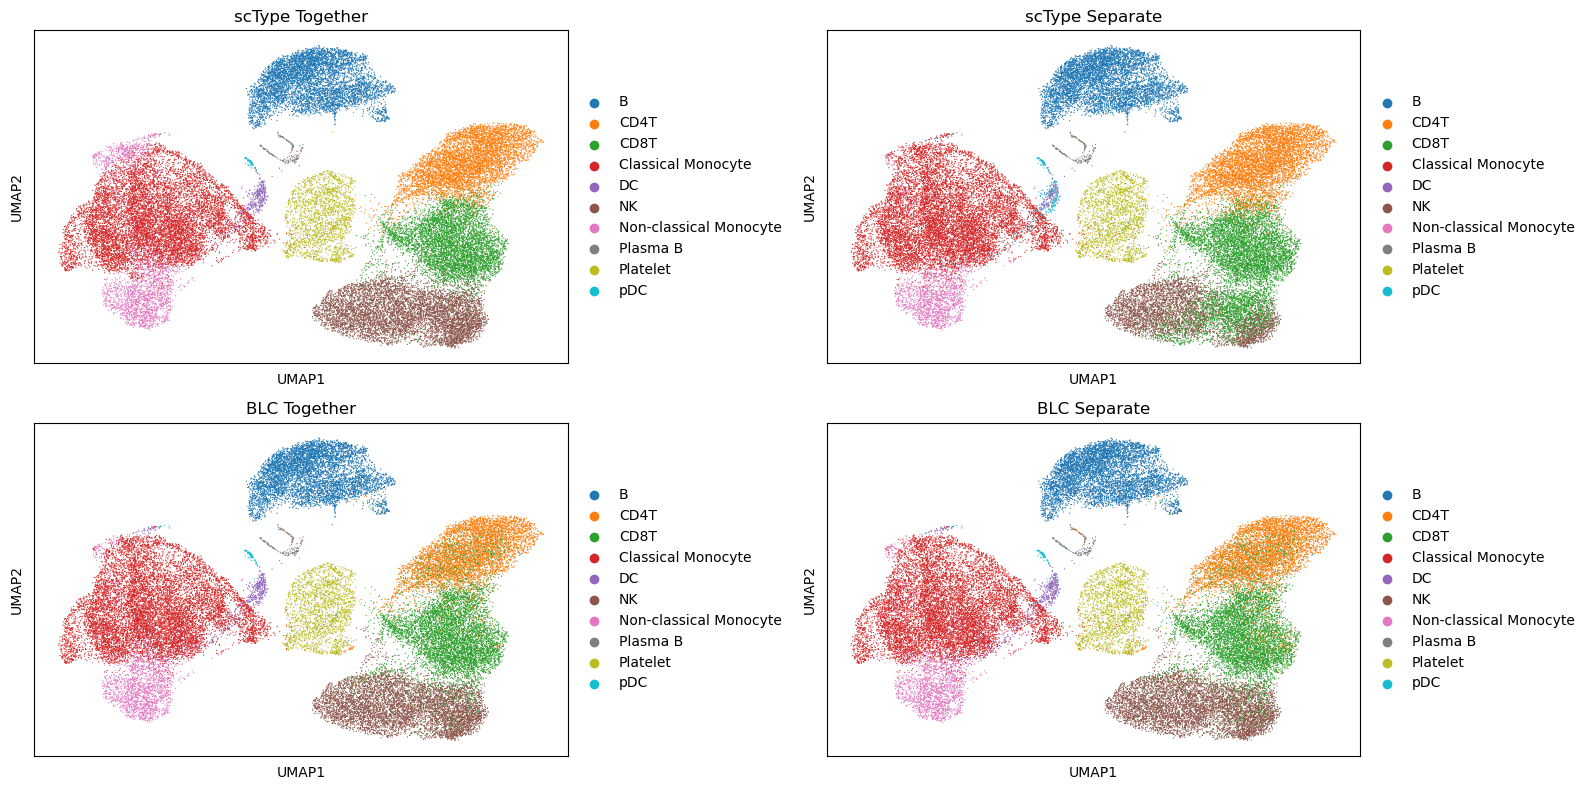

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

conditions = ['scType Together', 'scType Separate', 'BLC Together', 'BLC Separate']

for ax, condition in zip(axs.ravel(), conditions):
    sc.pl.umap(adata, color=condition, ax=ax, show=False)
    ax.set_title(condition)

# Adjust layout
plt.tight_layout()
# Show plot
#plt.savefig('umap_noncoherent_blcsctype.svg')
